### LSE Data Analytics Online Career Accelerator

# DA201: Data Analytics using Python

## Week 6: Assignment (Partial notebook)

The government employed an external consultant to assist with data analysis. However, the consultant resigned and left the project in a half-completed state. The government provided you with the partially completed Jupyter Notebook that the consultant developed. They asked you to evaluate and complete the Jupyter Notebook with Python code.

This assignment activity will consist of two parts: (1) demonstrate the use of the functions provided, and (2) answer additional questions posed by the government. The questions are:

- What is the difference between qualitative and quantitative data? How can these be used in business predictions?
- Why is continuous improvement required? Can we not just implement the project and move on to other pressing matters?
- As a government, we adhere to all data protection requirements and have good governance in place. We only work with aggregated data and therefore will not expose any personal details. Does that mean we can ignore data ethics?

In [2]:
# Libraries and settings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
# Load and select relevant subset of the data
# Make sure to change the relative path to function in your environment
ds1 = pd.read_csv('covid_19_uk_cases.csv')
ds2 = pd.read_csv('covid_19_uk_vaccinated.csv')

sample = ds1[['Province/State','Date','Hospitalised']]

In [7]:
# Select data for a specific province
sample_ci = sample[sample['Province/State'] == "Channel Islands"]

In [8]:
# Define function to plot moving averages
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):
    
    # Create a rolling window to calculate the rolling mean using the series.rolling function
    rolling_mean = series.rolling(window=window).mean()
    
    # Declare the dimensions for the plot, plot name and plot the data consisting of the rolling mean from above 
    plt.figure(figsize=(18,4))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Simple moving average trend')

    
    # Plot confidence intervals for smoothed values
    if plot_intervals:
        
        # Calculate the mean absolute square 
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        
        # Calculate the standard deviation using numpy's std function
        deviation = np.std(series[window:] - rolling_mean[window:])
        
        # Calculate the upper and lower bounds 
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        
        # Name and style upper and lower bound lines and labels 
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
    
    # Plot the actual values for the entire timeframe
    plt.plot(series[window:], label='Actual values')
    plt.grid(True)

In [9]:
# Define function to calculate the mean absolute error
def mean_absolute_error(a, b): return abs(b - a)

### Question 1:

The consultant indicated that the function is functional, but did not demonstrate how to use it. Use the provided function, `plot_moving_average()`, to plot the data for the selected province (variable name is `sample_ci` and set the window parameter to 7 days. 

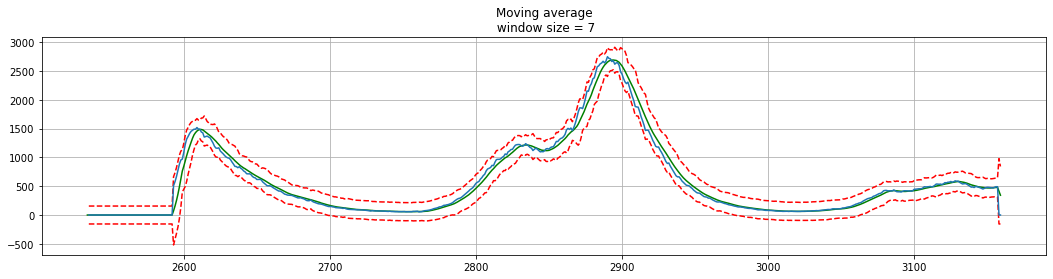

In [11]:
# Demonstrate the use of the function to plot moving averages

# Plot Moving Average - 7 Days soothing
# Hospitalised Cases in Channel Islands
plot_moving_average(sample_ci.Hospitalised, 7, plot_intervals=True)

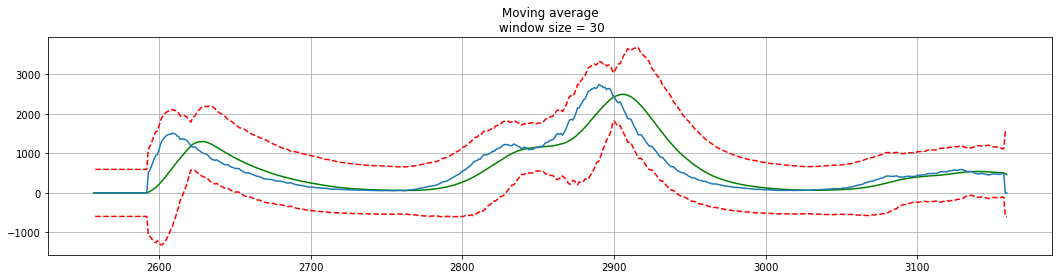

In [12]:
# Demonstrate the use of the function to plot moving averages
# Plot Moving Average - 30 Days soothing
# Hospitalised Cases in Channel Islands
plot_moving_average(sample_ci.Hospitalised, 30, plot_intervals=True)

### Question 2:

The consultant performed a calculation that looks interesting, but the team is unsure about what the intention was and how to interpret the output. Can you offer some insights into the meaning of the code and output in the cell below? Is it useful?

The code has been formulated to determine 3 days with maximum difference, compared to rolling 7 day average in the Channel Island data set for Hospitalised column. The output can be helpful in determining any unusual big spikes or dips in the data, which can effect the accuracy of predictions. 
In this case though the output does not serve the purpose as: 

The outliers have not yet been removed.
There isn't any historical data prior to these dates in the data set.

The big difference in rolling 7 day period and values of these 3 days is particulary because of data recorded as '0' prior to these dates. As a result, in this particular instance the output isn't showing the true picture and isn't useful.

In [10]:
# Return the top three days with biggest difference between daily value and rolling 7-day mean
s = sample_ci.copy()
s_rolling = s['Hospitalised'].rolling(window=7).mean()
s['error'] = mean_absolute_error(s['Hospitalised'][7:], s_rolling[7:])
s.sort_values('error', ascending=False).head(3)

,Province/State,Date,Hospitalised,error
2593,Channel Islands,2020-03-27,509.0,436.285714
2594,Channel Islands,2020-03-28,579.0,423.571429
2595,Channel Islands,2020-03-29,667.0,416.285714


### Question 3:

The management team had some additional questions around the project where they asked for further feedback to be included in your final presentation. Make sure to answer the questions in the Notebook in Markdown format in preparation for your presentation. The expectation is that you will provide short and direct responses to help them understand the importance and impact of the questions below.

> ***Note:*** You can double-click on the markdown cells to edit the text.

#### Question 3.1 (double click cell to edit)
- What is the difference between qualitative and quantitative data? How can these be used in business predictions?

Quantitative data in simple words is related to numbers, countable or measurable. It conveys how many, how much or how often etc. It is exposed to statistical manipulations and is gathered by counting or measuring things, for example: weight of people, length of table, etc. On the other hand Qualitative data is descriptive and helps to understand how and why. It is gathered through observations and interviews, for example: name, gender, color, type, etc.
Qualitative data is useful in forecasting when there isn't enough historical data to make statistically relevant predictions. This type of forecasting is subjective and open to interpretation. Examples of data would be customer feedback. It is helpful in short term forcasting but is more expensive to gather and difficult to process than quantitative data. Three qualitative forecasting methods are market research, delphi method and panel consensus.
Quantitative predictions relate to numerical data which are easily calculated and ideal for statistical analysis. Predictions are more accurate when there is historic data available. This historic data is analysed to make probable future predictions. Quantitative method can be further divided into time series and casual prediction methods, which are then further sub divided into various methods. 

#### Question 3.2 (double click cell to edit)
- Can you provide you observations around why continuous improvement is required, can we not just implement the project and move on to other pressing matters?

Continuous Improvement is a mindset and a process of continuously seeking to improve ways of doing things to be more efficient, to provide better service/product, to improve customer satisfaction and stay profitable. It is essential in modern competetive world for an organisation, in order to survive and stay profitable. It is important to reflect on our actions to establish learnings, in order to seek improvements and its implementation in future. Its a process that goes in loop and makes individuals/organisations perform better, resulting in increased efficiency, better quality product, happy customers and eventually higher profits. Every business operates to make profits and continuous improvement mindset just makes it easier to be profitable. 
If we just implement the project and move on to other pressing matters, then we will loose the opportunity to learn from our actions and miss the possibility to further improve the processes on that project. As a result, efficiency won't improve, product quality won't get better, customer satisfaction won't increase and eventually it will effect profitability.  

#### Question 3.3 (double click cell to edit)
- As a government, we adhere to all data protection requirements and have good governance in place. Does that mean we can ignore data ethics? We only work with aggregated data and therefore will not expose any personal details? (Provide an example of how data ethics could apply to this case; two or three sentences max)

As a government complying with data protection requirements and having good governance in place, does not licenses us to ignore data ethics. There has been examples where organisations have complied with rules, regulations and law regarding data protection and yet been criticized for breaching ethical practices. Data ethics complements government policies and legislation. Technology is changing and upgrading everyday, policies today might not be relevant tomorrow. While changes are made to policies, data ethics can ensure that data is used in a moral way with complete responsibility. Data ethics brings in the moral responsibility in play.
Data used by government should deliver public good and serve the public interest. In this it would mean avoiding to use data for any  ill intentions, political benefit, narrow private interests, etc. instead it should be used keeping in mind the interest of public. It should promote inclusivity, fairness, openness etc., and not harm society. Data analysis regarding COVID should be ethically presented to keep society aware and informed rather than scared and anxious.